In [ ]:
# !pip install seaborn --user

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as smf
import matplotlib.pyplot as plt


In [ ]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DPI_tweets = pd.DataFrame() 
DPI_tweets = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/DPI_tweets_raw.csv', index_col='Date') 

DPI_tweets 

,1,DPI_raw_tweets
Date,,
2020-10-02 12:59:46+00:00,1.312010e+18,@DavidJNage @defipulse index $DPI gives the be...
2020-10-02 11:37:20+00:00,1.311990e+18,このアルトコイン買付期間で以下の銘柄を買い付けました。さて、どうなることやら。\n\n$ET...
2020-10-02 11:35:04+00:00,1.311990e+18,Do not have time to research #DeFi projects?\n...
2020-10-02 08:43:16+00:00,1.311950e+18,$LEND migration today and it's the highest per...
2020-10-02 06:10:58+00:00,1.311910e+18,"Should I buy more $YFI, buy the $DPI index, fi..."
...,...,...
2022-09-02 14:11:16+00:00,1.565700e+18,$DPI ~Don't miss the next move in a few hours:...
2022-09-01 19:59:15+00:00,1.565430e+18,Quick look at the the August performance of th...
2022-09-01 19:28:37+00:00,1.565420e+18,$DPI Don't miss the next move in a few hours.~...


In [ ]:
def clean_text(text):
#will replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    #will consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)  
    #will replace newline with space
    text = re.sub("\n"," ",text)
    #will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    return text 

In [ ]:
DPI_tweets['DPI_clean_tweets'] = DPI_tweets['DPI_raw_tweets'].apply(clean_text) 

DPI_tweets 

,1,DPI_raw_tweets,DPI_clean_tweets
Date,,,
2020-10-02 12:59:46+00:00,1.312010e+18,@DavidJNage @defipulse index $DPI gives the be...,davidjnage defipulse index dpi gives the best ...
2020-10-02 11:37:20+00:00,1.311990e+18,このアルトコイン買付期間で以下の銘柄を買い付けました。さて、どうなることやら。\n\n$ET...,eth bnb atom dot beam kava scrt band sol ant f...
2020-10-02 11:35:04+00:00,1.311990e+18,Do not have time to research #DeFi projects?\n...,do not have time to research defi projects the...
2020-10-02 08:43:16+00:00,1.311950e+18,$LEND migration today and it's the highest per...,lend migration today and its the highest perce...
2020-10-02 06:10:58+00:00,1.311910e+18,"Should I buy more $YFI, buy the $DPI index, fi...",should i buy more yfi buy the dpi index finall...
...,...,...,...
2022-09-02 14:11:16+00:00,1.565700e+18,$DPI ~Don't miss the next move in a few hours:...,dpi dont miss the next move in a few hours htt...
2022-09-01 19:59:15+00:00,1.565430e+18,Quick look at the the August performance of th...,quick look at the the august performance of th...
2022-09-01 19:28:37+00:00,1.565420e+18,$DPI Don't miss the next move in a few hours.~...,dpi dont miss the next move in a few hours dis...


In [ ]:
# !pip install -U spacy

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')
sw_spacy = sp.Defaults.stop_words
# print(sw_spacy)

In [ ]:
def remove_sw(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text 

In [ ]:
DPI_tweets['DPI_clean_sw'] = DPI_tweets['DPI_clean_tweets'].apply(remove_sw) 

DPI_tweets 

,1,DPI_raw_tweets,DPI_clean_tweets,DPI_clean_sw
Date,,,,
2020-10-02 12:59:46+00:00,1.312010e+18,@DavidJNage @defipulse index $DPI gives the be...,davidjnage defipulse index dpi gives the best ...,davidjnage defipulse index dpi gives best expo...
2020-10-02 11:37:20+00:00,1.311990e+18,このアルトコイン買付期間で以下の銘柄を買い付けました。さて、どうなることやら。\n\n$ET...,eth bnb atom dot beam kava scrt band sol ant f...,eth bnb atom dot beam kava scrt band sol ant f...
2020-10-02 11:35:04+00:00,1.311990e+18,Do not have time to research #DeFi projects?\n...,do not have time to research defi projects the...,time research defi projects easiest way invest...
2020-10-02 08:43:16+00:00,1.311950e+18,$LEND migration today and it's the highest per...,lend migration today and its the highest perce...,lend migration today highest percentage dpi au...
2020-10-02 06:10:58+00:00,1.311910e+18,"Should I buy more $YFI, buy the $DPI index, fi...",should i buy more yfi buy the dpi index finall...,buy yfi buy dpi index finally start yuge snx b...
...,...,...,...,...
2022-09-02 14:11:16+00:00,1.565700e+18,$DPI ~Don't miss the next move in a few hours:...,dpi dont miss the next move in a few hours htt...,dpi dont miss hours httpstcovrbmgarg y
2022-09-01 19:59:15+00:00,1.565430e+18,Quick look at the the August performance of th...,quick look at the the august performance of th...,quick look august performance defi pulse index...
2022-09-01 19:28:37+00:00,1.565420e+18,$DPI Don't miss the next move in a few hours.~...,dpi dont miss the next move in a few hours dis...,dpi dont miss hours discord httpstcojut gzdofy


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [ ]:
DPI_tweets['DPI_subj'] = DPI_tweets['DPI_clean_sw'].apply(getSubjectivity) 
DPI_tweets['DPI_pol'] = DPI_tweets['DPI_clean_sw'].apply(getPolarity) 
DPI_tweets 

,1,DPI_raw_tweets,DPI_clean_tweets,DPI_clean_sw,DPI_subj,DPI_pol
Date,,,,,,
2020-10-02 12:59:46+00:00,1.312010e+18,@DavidJNage @defipulse index $DPI gives the be...,davidjnage defipulse index dpi gives the best ...,davidjnage defipulse index dpi gives best expo...,0.30,1.000000
2020-10-02 11:37:20+00:00,1.311990e+18,このアルトコイン買付期間で以下の銘柄を買い付けました。さて、どうなることやら。\n\n$ET...,eth bnb atom dot beam kava scrt band sol ant f...,eth bnb atom dot beam kava scrt band sol ant f...,0.00,0.000000
2020-10-02 11:35:04+00:00,1.311990e+18,Do not have time to research #DeFi projects?\n...,do not have time to research defi projects the...,time research defi projects easiest way invest...,0.00,0.000000
2020-10-02 08:43:16+00:00,1.311950e+18,$LEND migration today and it's the highest per...,lend migration today and its the highest perce...,lend migration today highest percentage dpi au...,0.00,0.000000
2020-10-02 06:10:58+00:00,1.311910e+18,"Should I buy more $YFI, buy the $DPI index, fi...",should i buy more yfi buy the dpi index finall...,buy yfi buy dpi index finally start yuge snx b...,0.90,-0.300000
...,...,...,...,...,...,...
2022-09-02 14:11:16+00:00,1.565700e+18,$DPI ~Don't miss the next move in a few hours:...,dpi dont miss the next move in a few hours htt...,dpi dont miss hours httpstcovrbmgarg y,0.00,0.000000
2022-09-01 19:59:15+00:00,1.565430e+18,Quick look at the the August performance of th...,quick look at the the august performance of th...,quick look august performance defi pulse index...,0.25,0.166667
2022-09-01 19:28:37+00:00,1.565420e+18,$DPI Don't miss the next move in a few hours.~...,dpi dont miss the next move in a few hours dis...,dpi dont miss hours discord httpstcojut gzdofy,0.00,0.000000


In [ ]:
DPI_tw_final = DPI_tweets.copy() 
DPI_tw_final

,1,DPI_raw_tweets,DPI_clean_tweets,DPI_clean_sw,DPI_subj,DPI_pol
Date,,,,,,
2020-10-02 12:59:46+00:00,1.312010e+18,@DavidJNage @defipulse index $DPI gives the be...,davidjnage defipulse index dpi gives the best ...,davidjnage defipulse index dpi gives best expo...,0.30,1.000000
2020-10-02 11:37:20+00:00,1.311990e+18,このアルトコイン買付期間で以下の銘柄を買い付けました。さて、どうなることやら。\n\n$ET...,eth bnb atom dot beam kava scrt band sol ant f...,eth bnb atom dot beam kava scrt band sol ant f...,0.00,0.000000
2020-10-02 11:35:04+00:00,1.311990e+18,Do not have time to research #DeFi projects?\n...,do not have time to research defi projects the...,time research defi projects easiest way invest...,0.00,0.000000
2020-10-02 08:43:16+00:00,1.311950e+18,$LEND migration today and it's the highest per...,lend migration today and its the highest perce...,lend migration today highest percentage dpi au...,0.00,0.000000
2020-10-02 06:10:58+00:00,1.311910e+18,"Should I buy more $YFI, buy the $DPI index, fi...",should i buy more yfi buy the dpi index finall...,buy yfi buy dpi index finally start yuge snx b...,0.90,-0.300000
...,...,...,...,...,...,...
2022-09-02 14:11:16+00:00,1.565700e+18,$DPI ~Don't miss the next move in a few hours:...,dpi dont miss the next move in a few hours htt...,dpi dont miss hours httpstcovrbmgarg y,0.00,0.000000
2022-09-01 19:59:15+00:00,1.565430e+18,Quick look at the the August performance of th...,quick look at the the august performance of th...,quick look august performance defi pulse index...,0.25,0.166667
2022-09-01 19:28:37+00:00,1.565420e+18,$DPI Don't miss the next move in a few hours.~...,dpi dont miss the next move in a few hours dis...,dpi dont miss hours discord httpstcojut gzdofy,0.00,0.000000


In [ ]:
DPI_tw_final.drop(columns = ['1', 'DPI_raw_tweets', 'DPI_clean_tweets', 'DPI_clean_sw'], inplace=True)

DPI_tw_final 

,DPI_subj,DPI_pol
Date,,
2020-10-02 12:59:46+00:00,0.30,1.000000
2020-10-02 11:37:20+00:00,0.00,0.000000
2020-10-02 11:35:04+00:00,0.00,0.000000
2020-10-02 08:43:16+00:00,0.00,0.000000
2020-10-02 06:10:58+00:00,0.90,-0.300000
...,...,...
2022-09-02 14:11:16+00:00,0.00,0.000000
2022-09-01 19:59:15+00:00,0.25,0.166667
2022-09-01 19:28:37+00:00,0.00,0.000000


In [ ]:
DPI_tw_final.sort_index(inplace=True)
DPI_tw_final 

,DPI_subj,DPI_pol
Date,,
2020-10-02 04:05:32+00:00,0.650000,0.800000
2020-10-02 04:05:32+00:00,0.650000,0.800000
2020-10-02 04:05:32+00:00,0.650000,0.800000
2020-10-02 04:05:32+00:00,0.650000,0.800000
2020-10-02 04:05:32+00:00,0.650000,0.800000
...,...,...
2022-09-28 06:01:28+00:00,0.000000,0.000000
2022-09-28 06:10:35+00:00,0.535714,0.285714
2022-09-28 06:10:35+00:00,0.535714,0.285714


In [ ]:
DPI_tw_final.index = DPI_tw_final.index.astype('datetime64[ns]')
DPI_tw_final 

,DPI_subj,DPI_pol
Date,,
2020-10-02 04:05:32,0.650000,0.800000
2020-10-02 04:05:32,0.650000,0.800000
2020-10-02 04:05:32,0.650000,0.800000
2020-10-02 04:05:32,0.650000,0.800000
2020-10-02 04:05:32,0.650000,0.800000
...,...,...
2022-09-28 06:01:28,0.000000,0.000000
2022-09-28 06:10:35,0.535714,0.285714
2022-09-28 06:10:35,0.535714,0.285714


In [ ]:
avg_DPI_tw = DPI_tw_final.resample('D').mean()

avg_DPI_tw 


# avg_polarity.dropna(inplace=True)
# avg_polarity.index = avg_polarity.index.rename('Date')
# avg_polarity.index = avg_polarity.index.astype('datetime64[ns]') 
# avg_polarity

,DPI_subj,DPI_pol
Date,,
2020-10-02,0.295370,0.237963
2020-10-03,0.575000,0.400000
2020-10-04,0.000000,0.000000
2020-10-05,NaN,NaN
2020-10-06,0.513231,0.172316
...,...,...
2022-09-24,0.357143,0.190476
2022-09-25,0.455357,0.142857
2022-09-26,0.446429,0.238095


In [ ]:
avg_DPI_tw.fillna(method="ffill", inplace=True)
avg_DPI_tw 

,DPI_subj,DPI_pol
Date,,
2020-10-02,0.295370,0.237963
2020-10-03,0.575000,0.400000
2020-10-04,0.000000,0.000000
2020-10-05,0.000000,0.000000
2020-10-06,0.513231,0.172316
...,...,...
2022-09-24,0.357143,0.190476
2022-09-25,0.455357,0.142857
2022-09-26,0.446429,0.238095


In [ ]:
avg_DPI_tw.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_DPI_pol_Final.csv', index=True) 

In [ ]:
## checking for correlation of twitter polarity with netflow 

avg_pol = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_DPI_pol_Final.csv', index_col='Date')  
DPI = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_aum_netflow_2.csv', index_col='Date')  

In [ ]:
DPI.index = DPI.index.astype('datetime64[ns]')
DPI 

,aum,net_flow,DPI_price
Date,,,
2020-09-10,9.699631e+02,969.963123,456.753025
2020-09-11,6.203445e+03,5854.244309,130.083626
2020-09-12,1.040195e+04,2931.811780,132.866086
2020-09-13,1.858037e+05,175075.408946,136.837190
2020-09-14,6.341173e+05,461649.081363,129.020509
...,...,...,...
2022-10-01,3.005462e+07,-0.823180,81.524879
2022-10-02,2.944343e+07,18624.325293,80.428076
2022-10-03,2.967774e+07,0.000000,80.371455


In [ ]:
avg_pol.index = avg_pol.index.astype('datetime64[ns]')
avg_pol 

,DPI_subj,DPI_pol
Date,,
2020-10-02,0.295370,0.237963
2020-10-03,0.575000,0.400000
2020-10-04,0.000000,0.000000
2020-10-05,0.000000,0.000000
2020-10-06,0.513231,0.172316
...,...,...
2022-09-24,0.357143,0.190476
2022-09-25,0.455357,0.142857
2022-09-26,0.446429,0.238095


In [ ]:
fin_df = pd.concat([DPI, avg_pol], axis=1) 
fin_df 

,aum,net_flow,DPI_price,DPI_subj,DPI_pol
Date,,,,,
2020-09-10,9.699631e+02,969.963123,456.753025,NaN,NaN
2020-09-11,6.203445e+03,5854.244309,130.083626,NaN,NaN
2020-09-12,1.040195e+04,2931.811780,132.866086,NaN,NaN
2020-09-13,1.858037e+05,175075.408946,136.837190,NaN,NaN
2020-09-14,6.341173e+05,461649.081363,129.020509,NaN,NaN
...,...,...,...,...,...
2022-10-01,3.005462e+07,-0.823180,81.524879,NaN,NaN
2022-10-02,2.944343e+07,18624.325293,80.428076,NaN,NaN
2022-10-03,2.967774e+07,0.000000,80.371455,NaN,NaN


In [ ]:
fin_df.dropna(inplace=True) 
fin_df 

,aum,net_flow,DPI_price,DPI_subj,DPI_pol
Date,,,,,
2020-10-02,1.845809e+06,111170.644378,93.949691,0.295370,0.237963
2020-10-03,2.090089e+06,210976.571202,95.739122,0.575000,0.400000
2020-10-04,2.072396e+06,37816.295757,92.867226,0.000000,0.000000
2020-10-05,2.073774e+06,27607.473664,91.856774,0.000000,0.000000
2020-10-06,2.350034e+06,485401.912825,80.905885,0.513231,0.172316
...,...,...,...,...,...
2022-09-24,2.864452e+07,0.000000,80.047552,0.357143,0.190476
2022-09-25,2.820221e+07,0.000000,79.329145,0.455357,0.142857
2022-09-26,2.750038e+07,-238218.462173,77.391190,0.446429,0.238095


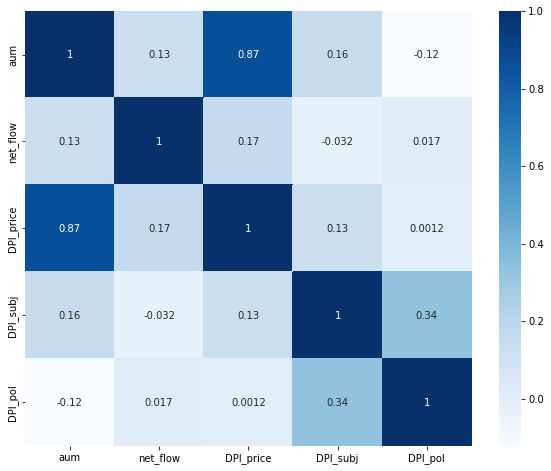

In [ ]:
import seaborn as sns 
corr = fin_df.corr()
corr 
plt.figure(figsize = (10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True) 

In [ ]:
final_df_scaled = pd.DataFrame(preprocessing.scale(fin_df))
final_df_scaled.columns = fin_df.columns 
final_df_scaled 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,aum,net_flow,DPI_price,DPI_subj,DPI_pol
0,-1.561423,-0.041287,-1.068505,0.079831,1.601485
1,-1.557556,0.031022,-1.055683,2.411785,3.364675
2,-1.557836,-0.094432,-1.076262,-2.383392,-0.987885
3,-1.557814,-0.101828,-1.083502,-2.383392,-0.987885
4,-1.553440,0.229843,-1.161972,1.896663,0.887149
...,...,...,...,...,...
722,-1.137116,-0.121829,-1.168122,0.594979,1.084762
723,-1.144119,-0.121829,-1.173270,1.414031,0.566601
724,-1.155231,-0.294418,-1.187157,1.339572,1.602924
725,-1.125875,-0.182558,-1.152920,-1.127894,-0.200678


In [ ]:
# Linear regression - Polarity &subjectivity
LR_df = final_df_scaled.copy()
# LR_df.replace([np.inf, -np.inf], np.nan, inplace=True) 
# LR_df.dropna(inplace=True)

X = LR_df.copy() 
X = X.drop(columns=['net_flow'])


# Y = final_df['ETH-USD']
Y = fin_df['net_flow'] 
Y = Y.reset_index() 
Y.drop(columns=['Date'], inplace=True) 


In [ ]:
X

,aum,DPI_price,DPI_subj,DPI_pol
0,-1.561423,-1.068505,0.079831,1.601485
1,-1.557556,-1.055683,2.411785,3.364675
2,-1.557836,-1.076262,-2.383392,-0.987885
3,-1.557814,-1.083502,-2.383392,-0.987885
4,-1.553440,-1.161972,1.896663,0.887149
...,...,...,...,...
722,-1.137116,-1.168122,0.594979,1.084762
723,-1.144119,-1.173270,1.414031,0.566601
724,-1.155231,-1.187157,1.339572,1.602924
725,-1.125875,-1.152920,-1.127894,-0.200678


In [ ]:
X_train = X.iloc[:650]
X_test = X.iloc[650:]

Y_train = Y.iloc[:650]
Y_test = Y.iloc[650:]

LR = LinearRegression().fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred = LR.predict(X_test) 

In [ ]:
Y_test

,net_flow
650,0.000000
651,0.000000
652,0.000000
653,0.000000
654,0.000000
...,...
722,0.000000
723,0.000000
724,-238218.462173
725,-83821.615687


In [ ]:
statistics_LR = smf.OLS(Y, smf.add_constant(X))
lR_summ = statistics_LR.fit()
lR_summ.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_flow   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.045
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           8.69e-05
Time:                        01:20:04   Log-Likelihood:                -11298.
No. Observations:                 727   AIC:                         2.261e+04
Df Residuals:                     722   BIC:                         2.263e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+05   5.05e+04      3.328      0.001     6.9e+04    2.67e+05
aum        -4.809e+04   1.06e+05     -0.453      0.651   -2.56e+05     1.6e+05
DPI_price   2.836e+05   1.04e+05      2.727      0.007    7.94e+04    4.88e+05
DPI_subj   -9.015e+04   5.51e+04     -1.635      0.102   -1.98e+05    1.81e+04
DPI_pol      4.79e+04   5.62e+04      0.853      0.394   -6.24e+04    1.58e+05
==============================================================================
Omnibus:                      475.394   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75728.141
Skew:                          -1.912   Prob(JB):                         0.00
Kurtosis:                      52.853   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rmse_train = r2_score(Y_train,Y_pred_train) 
rmse_test = r2_score(Y_test,Y_pred) 
print("R-squared training: {}".format(rmse_train)) 
print("R-squared test: {}".format(rmse_test)) 

R-squared training: 0.034167161800433
R-squared test: -0.9409708959224683


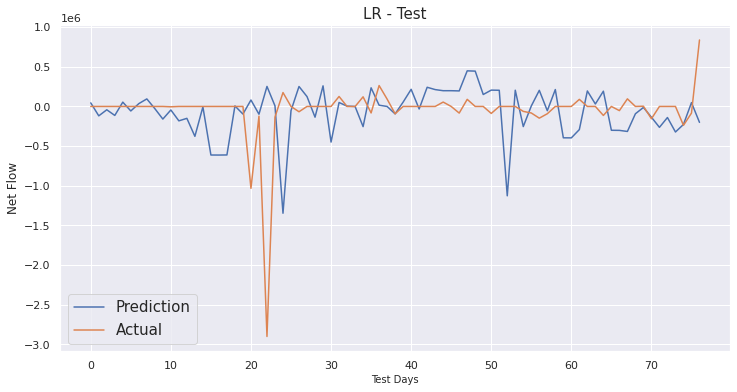

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("LR - Test", fontsize=15)
plt.plot(Y_pred, label="Prediction")
plt.plot(Y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png')

In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    else:
        return 'Positive'
    


In [ ]:
analysis = avg_pol.copy()
analysis['analysis'] = analysis['DPI_pol'].apply(getAnalysis)
analysis

,DPI_subj,DPI_pol,analysis
Date,,,
2020-10-02,0.295370,0.237963,Positive
2020-10-03,0.575000,0.400000,Positive
2020-10-04,0.000000,0.000000,Neutral
2020-10-05,0.000000,0.000000,Neutral
2020-10-06,0.513231,0.172316,Positive
...,...,...,...
2022-09-24,0.357143,0.190476,Positive
2022-09-25,0.455357,0.142857,Positive
2022-09-26,0.446429,0.238095,Positive


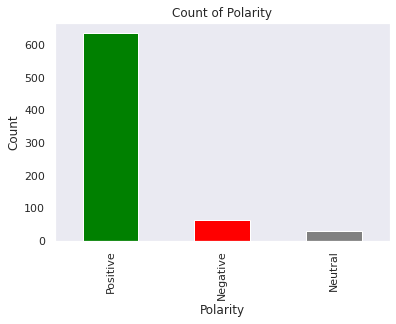

In [ ]:
fig = plt.figure(figsize=(6,4))
color = ['green', 'red', 'grey']
analysis['analysis'].value_counts().plot(kind='bar', color = color)

plt.title('Count of Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

In [ ]:
def strictAnalysis(score):
    if (score < -0.3):
        return 'Negative'
    elif (score > 0.3):
        return 'Positive'
    else:
        return 'Neutral' 

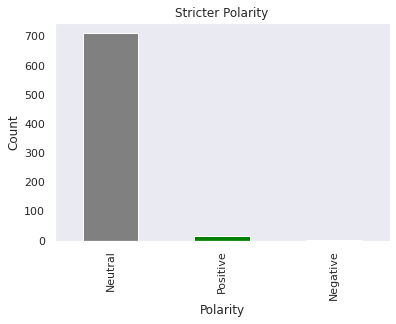

In [ ]:
analysis['analStrict'] = analysis['DPI_pol'].apply(strictAnalysis) 

fig = plt.figure(figsize=(6,4))
color = ['grey','green','red']
analysis['analStrict'].value_counts().plot(kind='bar', color = color)

plt.title('Stricter Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

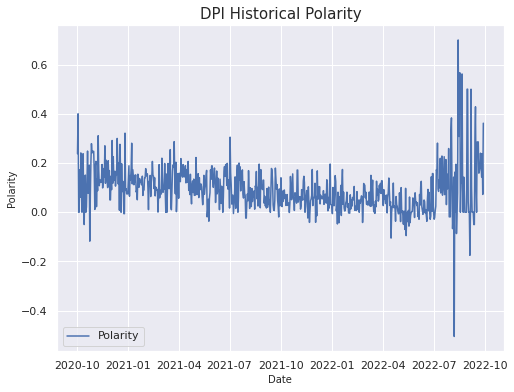

In [ ]:
sns.set(rc={'figure.figsize': (8,6)})
plt.xlabel("Date", fontsize=10)
plt.ylabel("Polarity", fontsize=10)
plt.title("DPI Historical Polarity", fontsize=15)
plt.plot(analysis['DPI_pol'], label="Polarity")
plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png') 